In [2]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tqdm import tqdm

pd.options.display.max_rows = 35 
pd.options.display.max_columns = None

## Train Test 1: Cluster

In [3]:
df = pd.read_csv('../../data/processed/WaterUpdated.csv').drop('id', axis = 1)
df.target.replace({'functional': 0, 'non functional': 1, 'functional needs repair': 1}, inplace = True)
print(df.shape)
new_df = df
new_df = new_df.join(pd.get_dummies(df.basin, prefix = 'basin'))
new_df = new_df.join(pd.get_dummies(df.extraction_type, prefix = 'extract'))
new_df = new_df.join(pd.get_dummies(df.quantity, prefix = 'quantity'))
new_df = new_df.join(pd.get_dummies(df.water_quality, prefix = 'quality'))
new_df = new_df.join(pd.get_dummies(df.source, prefix = 'source'))
new_df = new_df.join(pd.get_dummies(df.waterpoint_type, prefix = 'waterpoint'))


unique_basin = [f'basin_{i}' for i in df.basin.unique()]
unique_extract = [f'extract_{i}' for i in df.extraction_type.unique()]
unique_waterpoint = [f'waterpoint_{i}' for i in df.waterpoint_type.unique()]
unique_source = [f'source_{i}' for i in df.source.unique() if i != 'unknown']
unique_quality = [f'quality_{i}' for i in df.water_quality.unique() if i != 'unknown']
unique_quantity = [f'quantity_{i}' for i in df.quantity.unique() if i != 'unknown']

col = ['amount_tsh', 'gps_height', 'population', 'permit', 'time_passed', 'target', 'region', 'longitude', 'latitude']
col = col + unique_basin + unique_extract + unique_waterpoint + unique_source + unique_quality + unique_quantity 
new_df = new_df[col]
func_df = new_df[new_df.target == 0]
repair_df = new_df[new_df.target ==1]
print(len(repair_df))
resamp_repair = resample(repair_df, n_samples = len(repair_df), random_state = 10)
print(len(repair_df))

resampled_concat = pd.concat([func_df, resamp_repair])
X = resampled_concat
y = resampled_concat[['target']]

print(len(X), len(new_df))

standard = StandardScaler()
min_max  = MinMaxScaler()
pickle.dump(X.drop(['region', 'target'], axis = 1), open('../../data/processed/pickles/cluster_X.p', 'wb'))
pickle.dump(y, open('../../data/processed/pickles/cluster_y.p', 'wb'))

x_train, x_test, y_train, y_test = train_test_split(X,y, stratify = X.region.values, random_state = 10, train_size = .75)
print(y_train.target.value_counts(), y_test.target.value_counts())
x_train_longlat = x_train[['longitude', 'latitude']].values
x_train_longlat_scaled = min_max.fit_transform(x_train_longlat)
x_test_longlat_scaled = min_max.fit_transform(x_test_longlat)

x_test_longlat = x_test[['longitude', 'latitude']].values

x_train = x_train.drop(['longitude', 'latitude', 'region', 'target'], axis =1)
x_test = x_test.drop(['longitude', 'latitude', 'region', 'target'], axis =1)

# for i in range(1,21): 
#     kmeans = KMeans(n_jobs = -1, n_clusters= i, init = 'k-means++').inertia_ 

n_cluster = 10

    
    
df = pd.DataFrame()
df['cluster'] = kmeans_all
df['long'] = [i[0] for i in X[['longitude', 'latitude']].values]
df['lat'] = [i[1] for i in X[['longitude', 'latitude']].values]


x_train['cluster'] =KMeans(n_clusters = n_cluster, random_state = 0).fit_predict(x_train_longlat_scaled)
x_test['cluster'] = KMeans(n_clusters = n_cluster, random_state = 0).fit_predict(x_test_longlat_scaled)
for clus in df.cluster.unique(): 
    clust_df = df[df.cluster == clus]
    plt.scatter(clust_df.long, clust_df.lat, label = f'{clus}')
    plt.xlabel('Long'); plt.ylabel('lat')
    plt.savefig('figures/Cluster.png')

plt.legend()

pickle.dump(y_test, open('../../data/processed/pickles/cluster_y_test.p', 'wb'))
pickle.dump(y_train, open('../../data/processed/pickles/cluster_y_train.p', 'wb'))
pickle.dump(x_train, open('../../data/processed/pickles/cluster_x_train.p', 'wb'))
pickle.dump(x_test, open('../../data/processed/pickles/cluster_x_test.p', 'wb'))

(57247, 21)
25348
25348
57247 57247
0    24015
1    18920
Name: target, dtype: int64 0    7884
1    6428
Name: target, dtype: int64


NameError: name 'x_test_longlat' is not defined

Analyzing Intertia for a cluster of 19: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:23<00:00,  1.22s/it]


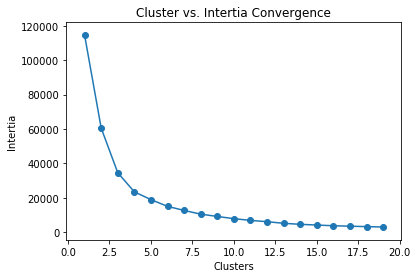

In [59]:
sse= []
pbar = tqdm(range(1,20))
for clus in pbar: 
    pbar.set_description(f'Analyzing Intertia for a cluster of {clus}')
    kmeans = KMeans(n_jobs = -1, n_clusters = clus, init = 'k-means++')
    kmeans.fit(standard.fit_transform(X[['longitude', 'latitude']]))
    sse.append(kmeans.inertia_)
plt.plot([i for i in range(1, len(sse)+1)], sse)
plt.scatter([i for i in range(1, len(sse)+1)], sse)
plt.xlabel('Clusters')
plt.ylabel('Intertia')
plt.title('Cluster vs. Intertia Convergence')
plt.savefig('figures/ConvergenceCluster.png')

# Train Test 2: Basin

In [5]:
df = pd.read_csv('../../data/processed/WaterUpdated.csv').drop('id', axis = 1)
df.target.replace({'functional': 0, 'non functional': 1, 'functional needs repair': 1}, inplace = True)
print(df.shape)
new_df = df
new_df = df.join(pd.get_dummies(df.basin, prefix = 'basin'))
new_df = new_df.join(pd.get_dummies(df.extraction_type, prefix = 'extract'))
new_df = new_df.join(pd.get_dummies(df.quantity, prefix = 'quantity'))
new_df = new_df.join(pd.get_dummies(df.water_quality, prefix = 'quality'))
new_df = new_df.join(pd.get_dummies(df.source, prefix = 'source'))
new_df = new_df.join(pd.get_dummies(df.waterpoint_type, prefix = 'waterpoint'))


unique_extract = [f'extract_{i}' for i in df.extraction_type.unique()]
unique_waterpoint = [f'waterpoint_{i}' for i in df.waterpoint_type.unique()]
unique_source = [f'source_{i}' for i in df.source.unique() if i != 'unknown']
unique_quality = [f'quality_{i}' for i in df.water_quality.unique() if i != 'unknown']
unique_quantity = [f'quantity_{i}' for i in df.quantity.unique() if i != 'unknown']

col = ['amount_tsh', 'gps_height', 'population', 'permit', 'time_passed', 'target', 'basin']
col = col + unique_extract + unique_waterpoint + unique_source + unique_quality + unique_quantity 
new_df = new_df[col]
func_df = new_df[new_df.target == 0]
repair_df = new_df[new_df.target ==1]

resamp_repair = resample(repair_df, n_samples = len(repair_df), random_state = 10)

resampled_concat = pd.concat([func_df, resamp_repair])
X = resampled_concat
y = resampled_concat[['target']]

print(len(X), len(new_df))

pickle.dump(X.drop('target', axis = 1), open('../../data/processed/pickles/basin_X.p', 'wb'))
pickle.dump(y, open('../../data/processed/pickles/basin_y.p', 'wb'))

x_train, x_test, y_train, y_test = train_test_split(X,y, stratify = X.basin.values, random_state = 10, train_size = .75)
print(y_train.target.value_counts(), y_test.target.value_counts())
x_train = x_train.drop(['target'], axis =1)
x_test = x_test.drop(['target'], axis =1)

pickle.dump(y_test, open('../../data/processed/pickles/basin_y_test.p', 'wb'))
pickle.dump(y_train, open('../../data/processed/pickles/basin_y_train.p', 'wb'))
pickle.dump(x_train, open('../../data/processed/pickles/basin_x_train.p', 'wb'))
pickle.dump(x_test, open('../../data/processed/pickles/basin_x_test.p', 'wb'))

(57247, 21)
57247 57247
0    23923
1    19012
Name: target, dtype: int64 0    7976
1    6336
Name: target, dtype: int64


## Train Test 1- All

In [ ]:
df = pd.read_csv('../../data/processed/WaterUpdated.csv').drop('id', axis = 1)
df.target.replace({'functional': 0, 'non functional': 1, 'functional needs repair': 1}, inplace = True)
print(df.shape)
new_df = df
new_df = df.join(pd.get_dummies(df.basin, prefix = 'basin'))
new_df = new_df.join(pd.get_dummies(df.extraction_type, prefix = 'extract'))
new_df = new_df.join(pd.get_dummies(df.quantity, prefix = 'quantity'))
new_df = new_df.join(pd.get_dummies(df.water_quality, prefix = 'quality'))
new_df = new_df.join(pd.get_dummies(df.source, prefix = 'source'))
new_df = new_df.join(pd.get_dummies(df.waterpoint_type, prefix = 'waterpoint'))


unique_basin = [f'basin_{i}' for i in df.basin.unique()]
unique_extract = [f'extract_{i}' for i in df.extraction_type.unique()]
unique_waterpoint = [f'waterpoint_{i}' for i in df.waterpoint_type.unique()]
unique_source = [f'source_{i}' for i in df.source.unique() if i != 'unknown']
unique_quality = [f'quality_{i}' for i in df.water_quality.unique() if i != 'unknown']
unique_quantity = [f'quantity_{i}' for i in df.quantity.unique() if i != 'unknown']

col = ['amount_tsh', 'gps_height', 'population', 'permit', 'time_passed', 'target']
col = col + unique_basin + unique_extract + unique_waterpoint + unique_source + unique_quality + unique_quantity 
new_df = new_df[col]
func_df = new_df[new_df.target == 0]
repair_df = new_df[new_df.target ==1]

resamp_repair = resample(repair_df, n_samples = len(repair_df), random_state = 10)

resampled_concat = pd.concat([func_df, resamp_repair])
X = resampled_concat
y = resampled_concat[['target']]

print(len(X), len(new_df))

pickle.dump(X.drop('target', axis = 1), open('../../data/processed/pickles/X.p', 'wb'))
pickle.dump(y, open('../../data/processed/pickles/y.p', 'wb'))

x_train, x_test, y_train, y_test = train_test_split(X,y, stratify = X.target, random_state = 10, train_size = .85)
print(y_train.target.value_counts(), y_test.target.value_counts())
x_train = x_train.drop('target', axis =1)
x_test = x_test.drop('target', axis =1)

pickle.dump(y_test, open('../../data/processed/pickles/y_test.p', 'wb'))
pickle.dump(y_train, open('../../data/processed/pickles/y_train.p', 'wb'))
pickle.dump(x_train, open('../../data/processed/pickles/x_train.p', 'wb'))
pickle.dump(x_test, open('../../data/processed/pickles/x_test.p', 'wb'))